In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


In [ ]:

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [ ]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df['Age'] = num_imputer.fit_transform(df[['Age']])
df['Embarked'] = cat_imputer.fit_transform(df[['Embarked']]).ravel()

In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [ ]:
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)


SVC(C=1)

In [ ]:
models = {
    "Decision Tree": dt,
    "Naive Bayes": nb,
    "SVM": svm
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} CV Accuracy: {scores.mean():.4f}")


Decision Tree CV Accuracy: 0.8126
Naive Bayes CV Accuracy: 0.7779
SVM CV Accuracy: 0.8283


In [ ]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [ ]:
boosting = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.5,
    random_state=42
)

boosting.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.5, random_state=42)

In [ ]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



Decision Tree
Accuracy: 0.7988826815642458
Precision: 0.8275862068965517
Recall: 0.6486486486486487
F1-score: 0.7272727272727273


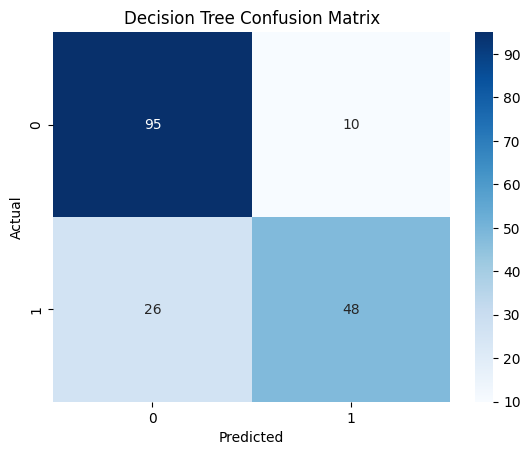


Naive Bayes
Accuracy: 0.770949720670391
Precision: 0.72
Recall: 0.7297297297297297
F1-score: 0.7248322147651006


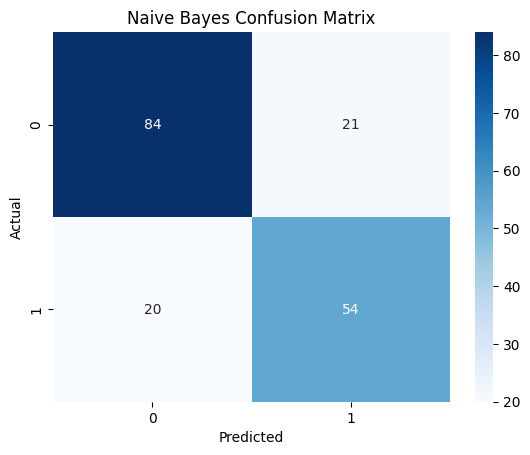


SVM
Accuracy: 0.8100558659217877
Precision: 0.8125
Recall: 0.7027027027027027
F1-score: 0.7536231884057971


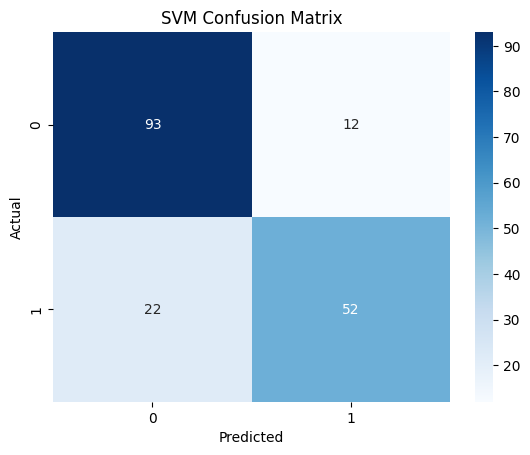


Bagging Ensemble
Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1-score: 0.7605633802816901


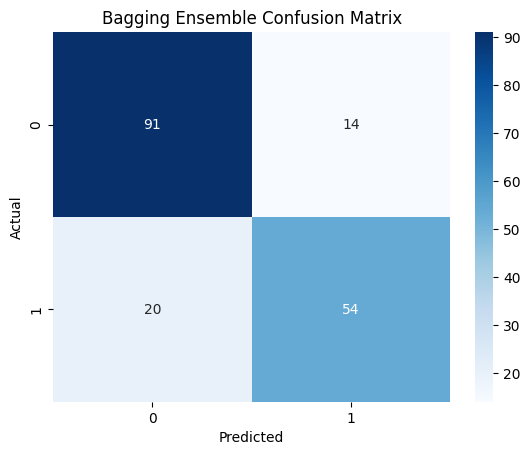


Boosting Ensemble
Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1-score: 0.7464788732394366


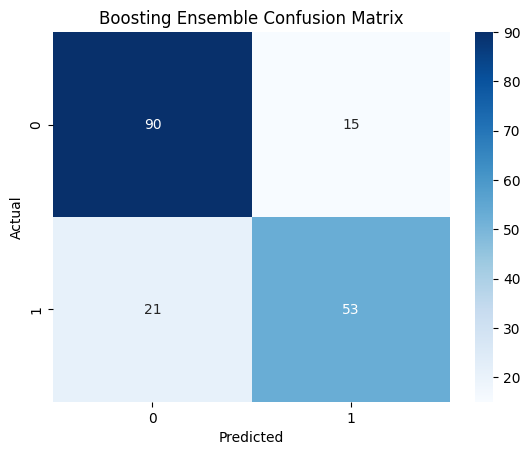

In [ ]:
evaluate_model(dt, X_test, y_test, "Decision Tree")
evaluate_model(nb, X_test, y_test, "Naive Bayes")
evaluate_model(svm, X_test, y_test, "SVM")
evaluate_model(bagging, X_test, y_test, "Bagging Ensemble")
evaluate_model(boosting, X_test, y_test, "Boosting Ensemble")
